# Tarea Examen 1
## Física Computacional
### López Villegas Fernando Maximiliano

## Ejercicio 1
Con el método de diferencias finitas hemos visto como calcular la derivada despreciando términos mayores o iguales a $h^5$. Utilizando esa misma técnica, obtenga una relación que proporcione directamente la segunda derivada despreciando terminos mayores o iguales a $h^5. D es esta manera hay dos maneras de obtener la segunda derivda numeric de una funcion, una es aplicando dos veces la función de primera derivada y la otra es utilizando la relación para la segunda derivada directamente. La pregunta es si estos dos procesos ¿Son equivalentes?. Para responder a ellos, utilice la siguiente función.

$$f(x) = \frac{\sin^2(5x)}{x^2+1} $$

obtenga su segunda derivada analitica, y compare las dos tecnicas anteriores con la solución analitica.
Al menos obtenga una precisión de $10^{-4}$ ¿Tienen la misma precisión?, si la respuesta es no, ¿Cual es mejor y por qué?



In [1]:
from pylab import*
import numpy as np
#Lo tipico hermano, importamos las librerias que vamos a usar.

Okay, esto ya lo habiamos hecho en la tarea 1, pero ahora resalatare las expresiones correspondientes para la primera y segunda derivada.

### $\textit{Central}$
$$
f(x_{0}+h) = f(x_{0}) +hf'(x_{0})+ \frac{h^2}{2!}f''(x_{0})+\frac{h^3}{3!}f'''(x_{0})+ \frac{h^4}{4!}f^{iv}(x_{0}) + \mathcal{O}(h^5)
$$
$$
f(x_{0}+h) = f(x_{0}) -hf'(x_{0})+ \frac{h^2}{2!}f''(x_{0})-\frac{h^3}{3!}f'''(x_{0})+ \frac{h^4}{4!}f^{iv}(x_{0}) + \mathcal{O}(h^5)
$$
$$
f(x_{0}+2h) = f(x_{0}) +2hf'(x_{0})+ 2h^2f''(x_{0})+\frac{4h^3}{3}f'''(x_{0})+ \frac{2h^4}{3}f^{iv}(x_{0}) + \mathcal{O}(h^5)
$$
$$
f(x_{0}-2h) = f(x_{0}) -2hf'(x_{0})+ 2h^2f''(x_{0})-\frac{4h^3}{3}f'''(x_{0})+ \frac{2h^4}{3}f^{iv}(x_{0}) + \mathcal{O}(h^5)
$$
Si lo vemos como un sistema de ecuaciones, entonces:

$$
 hx_{1} + \frac{h^2}{2!}x_{2} + \frac{h^3}{3!}x_{3} +\frac{h^4}{4!} x_{4} = a-w 
 $$ 
 $$
-hx_{1}+\frac{h^2}{2!}x_{2} -\frac{h^3}{3!}x_{3} + \frac{h^4}{4!}x_{4} = b-w $$
$$
2h x_{1} + 2h^2x_{2} + \frac{4h^3}{3}x_{3} + \frac{2h^4}{3}x_{4}= c -w 
$$ 
$$
-2h x_{1} +2h^2x_{2} -\frac{4h^3}{3}x_{3} + \frac{2h^4}{3}x_{4}= d-w    
$$

donde le asocie los valores $a, b, c, d, w$ a $f(x_{0}+h), f(x_{0}-h), f(x_{0}+2h), f(x_{0}-2h),f(x_{0})$ respectivamente porque los conocemos.

Asociándole su forma matricial tenemos:

$$
\left(
\begin{array}{cccc|c}
   h & \frac{h^2}{2!} & \frac{h^3}{3!} & \frac{h^4}{4!} & a-w \\
   -h &  \frac{h^2}{2!} & -\frac{h^3}{3!} & \frac{h^4}{4!} & b-w \\
    2h & 2h^2 & \frac{4h^3}{3} & \frac{2h^4}{3} & c -w \\
 -2h & 2h^2 & -\frac{4h^3}{3} & \frac{2h^4}{3} & d-w     
\end{array}
\right)
$$

Escalonando llegamos a que:
$$x_{1} = \frac{8a-8b-c+d}{12h} $$ 
$$x_{2} = \frac{16a+16b-c-d-30w}{12h^{2}}$$ 
$$x_{3} = \frac{-2a+2b+c-d}{2h^{3}}$$ 
$$x_{4} = \frac{-4a-4b+c+d+6w}{h^{4}}$$

Entonces encontramos que la $\textbf{primera derivada central}$ es:

$$f'(x_{0}) =\frac{8f(x_{0}+h)-8f(x_{0}-h)-f(x_{0}+2h)+f(x_{0}-2h) }{12h} $$ 

Y la $\textbf{segunda derivada central}$ es:

$$f''(x_{0}) =\frac{16f(x_{0}+h)+16f(x_{0}-h)-f(x_{0}+2h)-f(x_{0}-2h) -30f(x_{0})}{12h^2} $$ 

### $\textit{Extremos}$
Mhhh, para programar para los extremos, vamos a usar puntos dentro de la malla, y enfrente de nuestro punto de interes,es decir, $x+h,x+2h,x+3h,x+4h$.

Expandiendo con Taylor hasta cuarto orden, tenemos que:

$$
f(x_{0}+h) = f(x_{0}) +hf'(x_{0})+ \frac{h^2}{2!}f''(x_{0})+\frac{h^3}{3!}f'''(x_{0})+ \frac{h^4}{4!}f^{iv}(x_{0}) + \mathcal{O}(h^5)
$$

$$
f(x_{0}+2h) = f(x_{0}) +2hf'(x_{0})+ 2h^2f''(x_{0})+\frac{4h^3}{3}f'''(x_{0})+ \frac{2h^4}{3}f^{iv}(x_{0}) + \mathcal{O}(h^5)
$$

$$
f(x_{0}+3h) = f(x_{0}) +3hf'(x_{0})+ \frac{9h^2}{2}f''(x_{0})
+\frac{9h^3}{2}f'''(x_{0})+ \frac{27h^4}{8}f^{iv}(x_{0}) + \mathcal{O}(h^5)
$$

$$
f(x_{0}+4h) = f(x_{0}) +4hf'(x_{0})+ 8h^2f''(x_{0})+\frac{32h^3}{3}f'''(x_{0})+ \frac{32h^4}{3}f^{iv}(x_{0}) + \mathcal{O}(h^5)
$$

entonces asociamos un sistema de ecuaciones, y tomamos los coeficientes para una representación matricial y asi podamos escalonarla para encontrar las soluciones, entonces:

$$
\left(
\begin{array}{cccc|c}
   h &  \frac{h^2}{2!} & \frac{h^3}{3!} & \frac{h^4}{4!} & a-w \\
   2h & 2h^2 & \frac{4h^3}{3} &  \frac{2h^4}{3} & c-w \\
   3h & \frac{9h^2}{2} & \frac{9h^3}{2} & \frac{27h^4}{8} & q-w \\
   4h &  8h^2 & \frac{32h^3}{3} & \frac{32h^4}{3} & p-w
\end{array}
\right)
$$

entonces:
$$
x_{1} = \frac{48a-36c-3p+16q-25w}{12h} 
$$
$$
x_{2} = \frac{-104a+114c+11p-56q+35w}{12h^2}
$$
$$
x_{3} = \frac{18a-24c-3p+14q-5w}{2h^3}
$$
$$
x_{4} = \frac{-4a+6c+p-4q+w}{h^4}
$$

Entonces encontramos que la $\textbf{primera derivada en los extremos}$ es:
$$
f'(x_{0}) = \frac{48f_{i+1}-36f_{i+2}-3f_{i+4}+16f_{i+3}-25f_{i}}{12h}
$$

Y la $\textbf{segunda derivada en los extremos}$ es: 
$$
f''(x_{0}) = \frac{-104f_{i+1}+114f_{i+2}+11f_{i+4}-56f_{i+3}+35f_{i}}{12h^2}
$$

In [2]:
#Para la primera derivada escribimos este código:
#Con la variación de que ahora se que len(f)-1 se puede escribir como -1 
def deriv1(x,f):
    f_prima = zeros(len(f)) 
    h = x[1]-x[0] 
    for i in range(2,len(f)-2):
        f_prima[i] = (8*f[i+1]-8*f[i-1]-f[i+2]+f[i-2])/(12*h)    
    f_prima[0] = ( -(25/12)*f[0] + 4*f[1] -3*f[2] + (4/3)*f[3] - (1/4)*f[4] )/h
    f_prima[1] = ( -(25/12)*f[1] + 4*f[2] -3*f[3] + (4/3)*f[4] - (1/4)*f[5] )/h
    f_prima[-2] = -( -(25/12)*f[-2] + 4*f[-3] -3*f[-4] + (4/3)*f[-5] - (1/4)*f[-6] )/h
    f_prima[-1] = -( -(25/12)*f[-1] + 4*f[-2] -3*f[-3] + (4/3)*f[-4] - (1/4)*f[-5] )/h   
    return f_prima


In [3]:
#Y este para la segunda:
def deriv2(x,f):
    f_prima = zeros(len(f)) 
    h = x[1]-x[0] 
    for i in range(2,len(f)-2):
        f_prima[i] = (-(30/12)*f[i]+(4/3)*f[i+1]+(4/3)*f[i-1]-(1/12)*f[i+2]-(1/12)*f[i-2])/(h*h)
    f_prima[0] = ( (35/12)*f[0] - (26/3)*f[1] +(19/2)*f[2] - (14/3)*f[3] + (11/12)*f[4] )/(h*h)
    f_prima[1] = ( (35/12)*f[1] - (26/3)*f[2] +(19/2)*f[3] - (14/3)*f[4] + (11/12)*f[5] )/(h*h)
    f_prima[-2] = ( (35/12)*f[-2] - (26/3)*f[-3] +(19/2)*f[-4] - (14/3)*f[-5] + (11/12)*f[-6] )/(h*h)
    f_prima[-1] =  ( (35/12)*f[-1] - (26/3)*f[-2] +(19/2)*f[-3] - (14/3)*f[-4] + (11/12)*f[-5] )/(h*h)
    #A diferencia del caso de la primera derivada aquí no obtenemos un signo menos para las dos últimas primas pues la h escupe el signo menos, pero se cancela con el otro signo menos.
    return f_prima

Bueno, derivando analiticamente tenemos que :

$$
f'(x) = -\frac{2\sin(5x)(x\sin(5x)+(-5x^2-5)\cos(5x))}{(x^2+1)^2}
$$
y
$$
f''(x) = -\frac{2\left(\left(25x^4+47x^2+26\right)\sin^2\left(5x\right)+\left(20x^3+20x\right)\cos\left(5x\right)\sin\left(5x\right)+\left(-25x^4-50x^2-25\right)\cos^2\left(5x\right)\right)}{\left(x^2+1\right)^3}
$$

Necesitamos hacer dos metodos:
1. Aplicar dos veces deriv1 a f
2. Aplicar solo una vez deriv2 a f

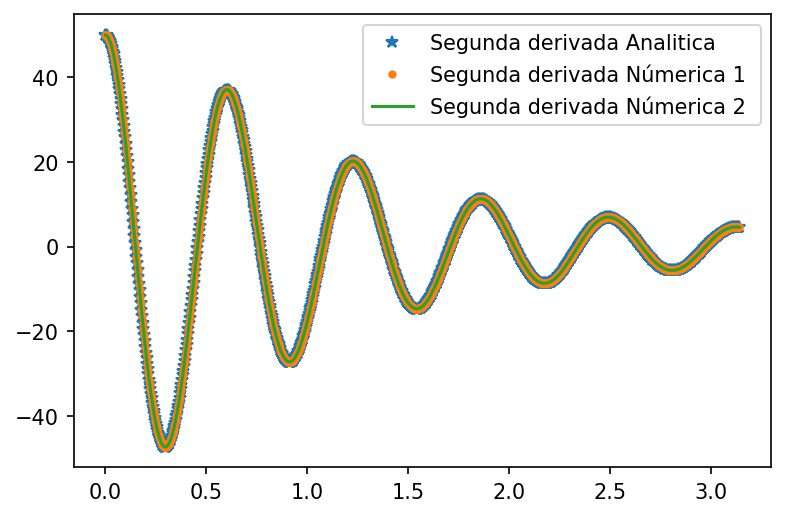

In [4]:
figure(dpi=150)
x=linspace(0,pi,1000)
f = ((sin(5*x))**2)/(x**2+1)
f_derivanalitica1 = -(2*sin(5*x)*(x*sin(5*x)+(-5*x**2-5)*cos(5*x)))/((x**2+1)**2)
f_derivanalitica2 = -(2*((25*x**4+47*x**2+26)*sin(5*x)**2+(20*x**3+20*x)*cos(5*x)*sin(5*x)+(-25*x**4-50*x**2-25)*cos(5*x)**2))/(x**2+1)**3

#Primero hice algo del estilo así, obvio no me saliío.
#f_Der1 = deriv1(x,f)
#f_Der11 = deriv1(x,f_Der11) #incluso aquí se puede ver que ya hay problemas, no es una función, ¡Es un array!
#Pero, esto de aquí si...


f = ((sin(5*x))**2)/(x**2+1)
f_Der11 = deriv1(x,deriv1(x,f)) 
f_NDer2 = deriv2(x,f)

#plot(x,f,label =' f')
plot(x,f_derivanalitica2,'*', label = 'Segunda derivada Analitica')
plot(x,f_NDer2,'.',label = 'Segunda derivada Númerica 1 ')
plot(x,f_Der11,'-',label = 'Segunda derivada Númerica 2 ')
legend()
show()

A simple vista parece que son iguales, pero si checamos bien, en el incio de la grafica se ven distintos, primero veamos el error entre estas.

In [5]:
#En la tarea defini la siguiente función.
def Error(f_1,f_2):
    O = zeros(len(f_1)) 
    if len(f_1)==len(f_2):
        for i in range(len(f_1)):
            O[i] = abs(f_1[i]-f_2[i])
    else:
        print('no es del mismo tamaño tus funciones bro')
    return O

h  es  0.0031447373909807737


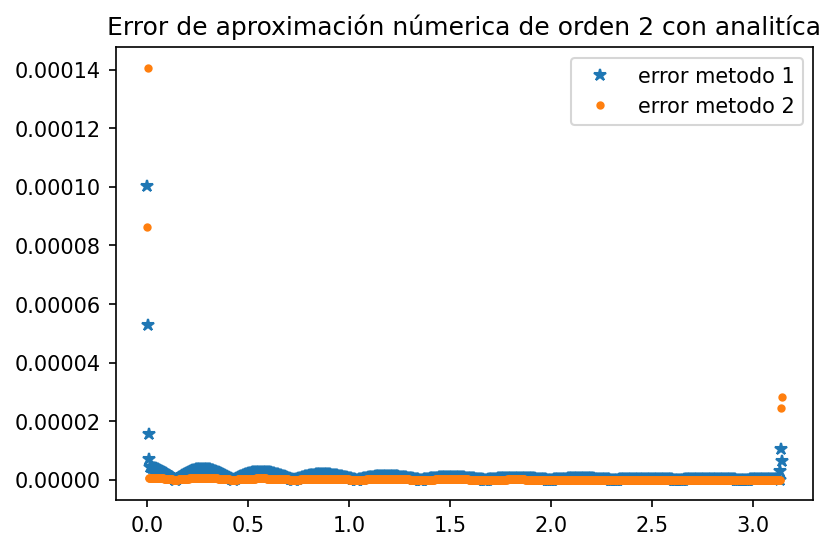

In [6]:
figure(dpi=150)
ERROR1 = Error(f_derivanalitica2,f_Der11) 
ERROR2 = Error(f_derivanalitica2,f_NDer2) 
plot(x,ERROR1,'*',label="error metodo 1")
plot(x,ERROR2,'.',label= 'error metodo 2')
title('Error de aproximación númerica de orden 2 con analitíca')
legend()
print ('h  es ', x[1]-x[0]) #Aqui ta la h
show()

In [7]:
max(ERROR1)


0.00010030675043992687

In [8]:
max(ERROR2)

0.00014058758569746033

Es que según yo deberia ser mas preciso el segundo metodo de aplicar solo una vez, pues al aplicar dos veces, se acarrea el error de calcular una vez.
Y no no son equivalentes.
Lo que me extraña mucho es en el extremo, pero seguire mi postura porque es lo obvio, acarrea un error, y porque el comportamiento de los puntos del interior es el lógico, tiene un error menor al de el primer método.

# Ejercicio 2
El objetivo del siguiente problema es obtener la curva de convergencia que se piden en los incisos de este problema. Para ello inicie con una partición de un segmento y vea el resultado de la integral, este primer segmento estara subdividido en 3 pedazos en el caso $\textbf{Simp\_3\_8}$ o en 4 en el caso de $\textbf{Bode}$. Posteriormente divida la particion en 2 y obtenga el resultado de la integral. Repita este procedimiento de dividir la partición en 2 hasta obtener una precisión de $10^-4$, es decir, que el resultado de la integral no cambie al menos 4 cifras. Realice en cada caso una gráfica del reultado de la integral contra el número de particiones en cada caso.

$$
(a) \, \int_{0}^{1} \frac{dx}{1+x^2} = \frac{\pi}{4} = 0.7853981633974483
$$

$$
(b) \, \int_{0}^{3} \frac{dx}{1+x^3} = 1.154448512586443
$$

$$
(c) \, \int_{0}^{0.4} \sin(x^2)\, dx = 0.02129435557035516
$$

$$
(d)  \, \int_{2}^{4} \frac{dx}{ln(x)} = 1.922421314921558
$$

$$
(e) \, \int_{0}^{1}xe^{-x}\, dx = 0.2642411176571154
$$

Vamos a usar el algoritmo de Simspon, entonces:
$$
\int_{x_0}^{x_3}f(x)\, dx = \frac{3h}{8}(f_0+32f_1+3f_2+f_3)
$$

In [9]:
#pues definimos la integral de simpson y ya
def intHomero(x,f):
    integral = 0
    h = x[1] - x[0]
    for i in range(0,len(f)-3,3): #no dice, pero el step debe ser 3 en 3
        integral += 3*(f[i]+3*f[i+1]+3*f[i+2]+f[i+3]) /8 #lit, solo fue poner la formula y ya
    return integral*h

Bueno, queremos empezar con 3 pedazos,pues explicitamente nos dice que empezos con un segmento el cual para Simspon estara subdividido en 3 partes. Entonces

Bueno, estuve modificando mi algoritmo y por fin pude plasmarlo en un código funcional, aquí una de las versiones previas.

In [10]:
#def Juanito(inicio,final,f,w): 
 #   INTT = [] #es donde guradaremos el valor de la integral en cada iteración
  #  PARTICIONES = [] #el número de particiones en cada iteración
   # kala = []
    #i = 0  
    #u = 10**(-4) #u es el error que se quiere, en este caso 10e-14 
    #error = w
    #kylo = (final-inicio)/3
    #while i < 13:
     #   x = linspace(inicio,final,3*2**i) #aumentamos el número de particiones en 3*i
      #  h = kylo/(2**i) #aumentamos el intervalo en 2**i
       # integral = homeromodificado(x,f) 
        #INTT.append(integral) #guardamos el valor de la integral en cada iteración
        #P3ARTICIONES.append(len(x)) #guardamos el número de particiones en cada iteración
        #error = abs(integral - w) #el error es la diferencia entre el valor de la integral y el valor de la integral analitica
        #kala.append(i)
        #i += 1 
        
        
    #return integral*h, len(x), INTT, PARTICIONES, kylo,h, integral, error, kala
  




In [11]:
#Lo que queremos es un error de 10^-4, entonces, para eso, 
#vamos a hacer un ciclo que vaya aumentando el numero de puntos en la malla hasta que el error sea menor a 10^-4
#Como dice el ejercicio, debemos empezar con 3 puntos, entonces..los iremos dividiendo en 2, y luego otra vez y así hasta que el error sea menor a 10^-4
#def Porcelana(inicio,final,f):
 #   INTT = []
  #  PARTICIONES = []
   # x = linspace(inicio,final,6)
    #error = 1
    #while error > 10**-4:
     #   integral = intHomero(x,f)
      #  x = linspace(0,1,len(x)*2)
       # error = abs(integral - intHomero(x,f))
        #INTT.append(integral)
        #PARTICIONES.append(len(x))
    #return integral, len(x), INTT, PARTICIONES
#Esta función no sirve, me deja sin memoria pero no se porque.
#Cada vez que lo corro, no me da el mismo numero de particiones.
#Y al principio lo corria con el número 3 en número de puntos, o sea particiones.
#Lo haré manualmente, pero no se porque no me funciona.

In [12]:
def Juanito1(inicio,final,w): 
    INTT = [] #es donde guradaremos el valor de la integral en cada iteración
    PARTICIONES = [] #el número de particiones en cada iteración
    ERRORS = []
    i = 0  
    u = 10**(-4) #u es el error que se quiere, en este caso 10e-14 
    error = w #el valor de la integral analitica
    #kylo = (final-inicio)/3 
    x = linspace(inicio,final,3) #pa la i=0
    f = 1/(1+x**2) #lo mismo XD
    while error > u:
        x = linspace(inicio,final,3*2**i) #aumentamos el número de particiones en 3*i
        #h = kylo/(2**i) #aumentamos el intervalo en 2**i
        f = 1/(1+x**2)
        z = intHomero(x,f)        
        INTT.append(z) #guardamos el valor de la integral en cada iteración
        PARTICIONES.append(len(x)) #guardamos el número de particiones en cada iteración
        error = abs(z - w) #el error es la diferencia entre el valor de la integral y el valor de la integral analitica
        ERRORS.append(error)
        i += 1 
    return z, len(x),i, INTT, PARTICIONES, ERRORS
#donde z es el valor de la integral con error = 10e-4 
# donde len(x), el # de particions para estea iteraión
#i el número de iteraciones
#INTT es el conjunto de valores que dio la integral en cada iteración
#PARTICIONES es el conjunto de número de particiones en cada iteración
#ERRORS es el conjunto de errores en cada iteración

In [13]:
p1 = 0.7853981633974483
Valorint1, Partitis1, iterashions1, KIGUI1, LLUVIA1,ERRORS1 = Juanito1(0,1,p1)
print('El valor de la integral es: ', Valorint1)
print('El número de particiones usadas fue: ', Partitis1)
print('El número de iteraciones es: ', iterashions1)


El valor de la integral es:  0.7853167699416642
El número de particiones usadas fue:  12288
El número de iteraciones es:  13


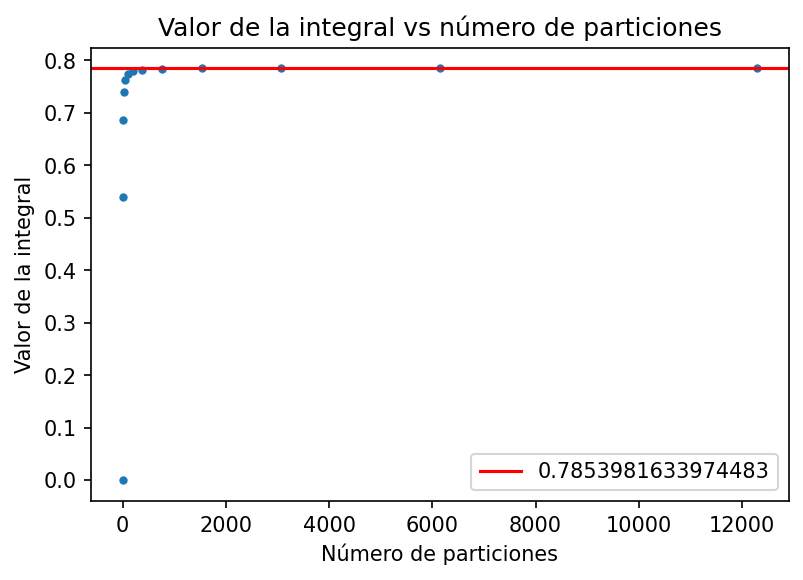

In [14]:
#Vamos a plotear esta cosa
figure(dpi=150)
plot(LLUVIA1,KIGUI1,'.')
axhline(p1, color='r', label  = '0.7853981633974483')
xlabel("Número de particiones")
ylabel("Valor de la integral")
title("Valor de la integral vs número de particiones")
legend()
show()

###

# #2
Como ya mencione, no pude automatizarlo del todo, por lo que tendre que hacer varias cosas a mano, como insertar la función, y el valor analitico.

In [15]:
def Juanito2(inicio,final,w): 
    INTT = [] 
    PARTICIONES = [] 
    ERRORS = []
    i = 0  
    u = 10**(-4)  
    error = w  
    x = linspace(inicio,final,3) 
    f = 1/(1+x**3) #Aquí voy a poner la función 2
    while error > u:
        x = linspace(inicio,final,3*2**i) 
        f = 1/(1+x**3)
        z = intHomero(x,f)        
        INTT.append(z) 
        PARTICIONES.append(len(x)) 
        error = abs(z - w) 
        ERRORS.append(error)
        i += 1 
    return z, len(x),i, INTT, PARTICIONES, ERRORS

In [16]:
p2 = 1.154448512586443
Valorint2, Partitis2, iterashions2, KIGUI2, LLUVIA2,ERRORS2 = Juanito2(0,3,p2)
print('El valor de la integral es: ', Valorint2)
print('El número de particiones usadas fue: ', Partitis2)
print('El número de iteraciones es: ', iterashions2)

El valor de la integral es:  1.1543786696247007
El número de particiones usadas fue:  3072
El número de iteraciones es:  11


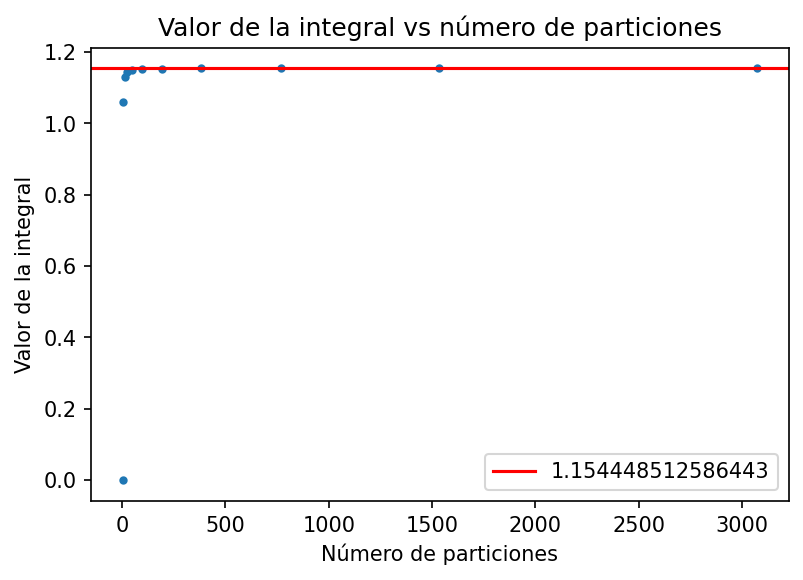

In [17]:
#Vamos a plotear esta cosa
figure(dpi=150)
plot(LLUVIA2,KIGUI2,'.')
axhline(p2, color='r', label  = '1.154448512586443')
xlabel("Número de particiones")
ylabel("Valor de la integral")
title("Valor de la integral vs número de particiones")
legend()
show()

# #3

In [18]:
def Juanito3(inicio,final,w): 
    INTT = [] 
    PARTICIONES = [] 
    ERRORS = []
    i = 0  
    u = 10**(-4)  
    error = w  
    x = linspace(inicio,final,3) 
    f = sin(x**2) #Aquí voy a poner la función 2
    while error > u:
        x = linspace(inicio,final,3*2**i) 
        f = sin(x**2)
        z = intHomero(x,f)        
        INTT.append(z) 
        PARTICIONES.append(len(x)) 
        error = abs(z - w) 
        ERRORS.append(error)
        i += 1 
    return z, len(x),i, INTT, PARTICIONES, ERRORS

In [19]:
p3 = 0.02129435557035516
Valorint3, Partitis3, iterashions3, KIGUI3, LLUVIA3,ERRORS3 = Juanito3(0,0.4,p3)
print('El valor de la integral es: ', Valorint3)
print('El número de particiones usadas fue: ', Partitis3)
print('El número de iteraciones es: ', iterashions3)

El valor de la integral es:  0.021211430496713157
El número de particiones usadas fue:  1536
El número de iteraciones es:  10


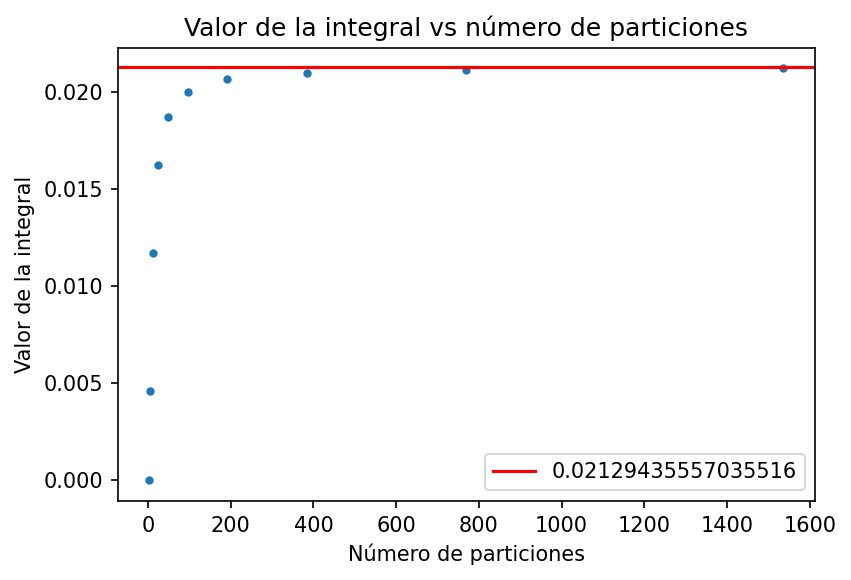

In [20]:
#Vamos a plotear esta cosa
figure(dpi=150)
plot(LLUVIA3,KIGUI3,'.')
axhline(p3, color='r', label  = '0.02129435557035516')
xlabel("Número de particiones")
ylabel("Valor de la integral")
title("Valor de la integral vs número de particiones")
legend()
show()

# #4

In [21]:
def Juanito4(inicio,final,w): 
    INTT = [] 
    PARTICIONES = [] 
    ERRORS = []
    i = 0  
    u = 10**(-4)  
    error = w  
    x = linspace(inicio,final,3) 
    f = 1/log(x) #Aquí voy a poner la función 2
    while error > u:
        x = linspace(inicio,final,3*2**i) 
        f = 1/log(x)
        z = intHomero(x,f)        
        INTT.append(z) 
        PARTICIONES.append(len(x)) 
        error = abs(z - w) 
        ERRORS.append(error)
        i += 1 
    return z, len(x),i, INTT, PARTICIONES, ERRORS

In [22]:
p4 = 1.922421314921558
Valorint4, Partitis4, iterashions4, KIGUI4, LLUVIA4,ERRORS4 = Juanito4(2,4,p4)
print('El valor de la integral es: ', Valorint4)
print('El número de particiones usadas fue: ', Partitis4)
print('El número de iteraciones es: ', iterashions4)

El valor de la integral es:  1.9223626098771471
El número de particiones usadas fue:  49152
El número de iteraciones es:  15


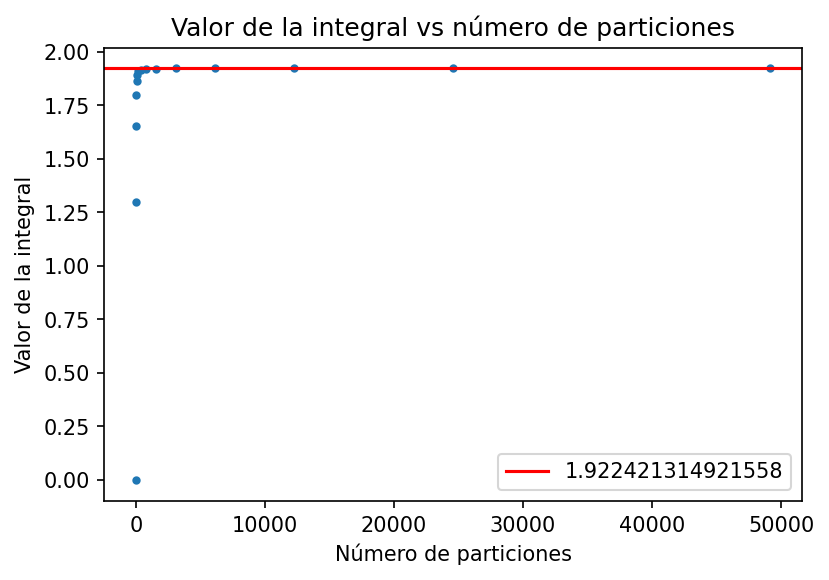

In [23]:
#Vamos a plotear esta cosa
figure(dpi=150)
plot(LLUVIA4,KIGUI4,'.')
axhline(p4, color='r', label  = '1.922421314921558')
xlabel("Número de particiones")
ylabel("Valor de la integral")
title("Valor de la integral vs número de particiones")
legend()
show()

# #5

In [24]:
def Juanito5(inicio,final,w): 
    INTT = [] 
    PARTICIONES = [] 
    ERRORS = []
    i = 0  
    u = 10**(-4)  
    error = w  
    x = linspace(inicio,final,3) 
    f = x*exp(-x) #Aquí voy a poner la función 2
    while error > u:
        x = linspace(inicio,final,3*2**i) 
        f = x*exp(-x)
        z = intHomero(x,f)        
        INTT.append(z) 
        PARTICIONES.append(len(x)) 
        error = abs(z - w) 
        ERRORS.append(error)
        i += 1 
    return z, len(x),i, INTT, PARTICIONES, ERRORS

In [25]:
p5 = 0.2642411176571154
Valorint5, Partitis5, iterashions5, KIGUI5, LLUVIA5,ERRORS5 = Juanito5(0,1,p5)
print('El valor de la integral es: ', Valorint5)
print('El número de particiones usadas fue: ', Partitis5)
print('El número de iteraciones es: ', iterashions5)

El valor de la integral es:  0.26418123657311693
El número de particiones usadas fue:  12288
El número de iteraciones es:  13


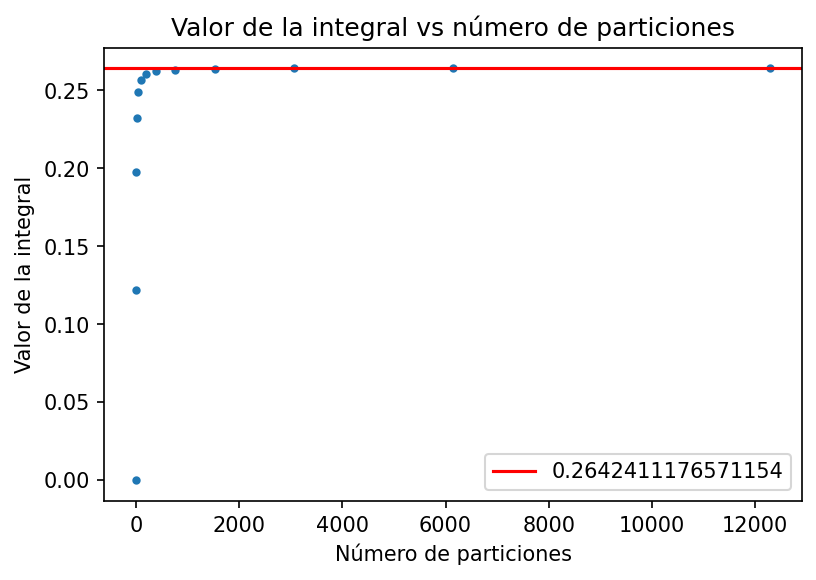

In [26]:
#Vamos a plotear esta cosa
figure(dpi=150)
plot(LLUVIA5,KIGUI5,'.')
axhline(p5, color='r', label  = '0.2642411176571154')
xlabel("Número de particiones")
ylabel("Valor de la integral")
title("Valor de la integral vs número de particiones")
legend()
show()

# Ejercicio 3

Sabemos que la definición de la función logaritmo es $\int_{1}^{x}  \frac{dt}{t}= \ln(x)$. Construya una función que calcule la función logaritmo utilizando la definición de la integral. El cálculo de la integral debe tener una precisión de al menos $10{-4}$. Para corroborar los resultados, realice la gráfica de $\ln(x)$ en el intervalo $[0.1,1000]$, y compare contra la función que viene en Python. Tu función debe llamarse $\textbf{mi\_ln(x)}$, y debe calcular el valor, o los valores de x independientemente si la entrada es un número o un arreglo de números.

In [27]:
#O sea, estaba jugando con lo que le podia dar de comer a la función de homero, y en una de esas hice lo siguiente
x = linspace(1,0.1,1000)
f = 1/x
intHomero(x,f)

-2.3025850934878314

In [28]:
log(0.1)

-2.3025850929940455

Y como podemos ver, solo era remplazar unas cosillas del homero, y ya, lo hice en el siguiente código.

In [29]:
#debo una explicación XD
def mi_ln(x): #adentro dice porque, pero pues es solo darle de comer un punto a la vez
    integral = 0
    y = linspace(1,x,10000) #bueno, como dice el enunciado, es como una integral de 1 a x, y lit solo hice eso
    #la razón de porque 10000 es para la precisión.
    f = y**-1 #la función que quiero integrar es esa, y pues ya
    h = y[1] - y[0]
    for i in range(0,len(f)-3,3): 
        integral += 3*(f[i]+3*f[i+1]+3*f[i+2]+f[i+3]) /8 
    return integral*h

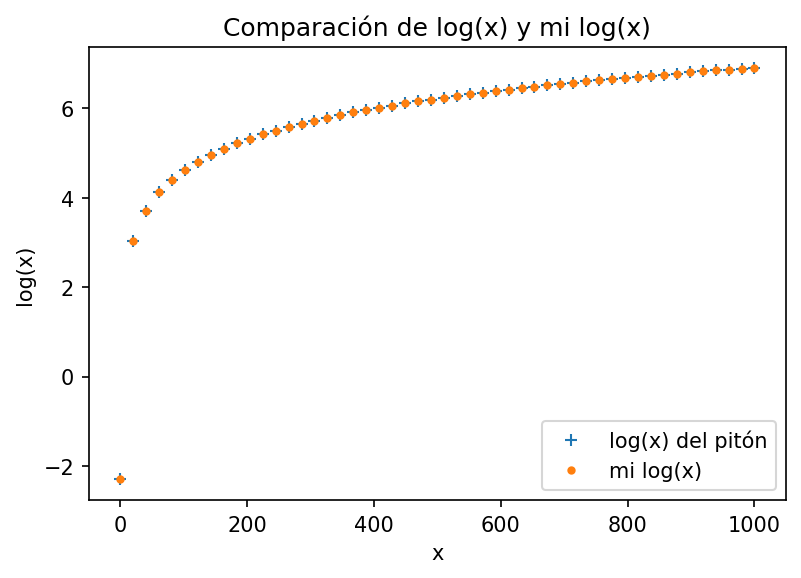

In [30]:
figure(dpi=150)
x = linspace(0.1,1000)
plot(x,log(x),'+',label="log(x) del pitón")
plot(x,mi_ln(x),'.',label="mi log(x)")
title('Comparación de log(x) y mi log(x)')
ylabel('log(x)')
xlabel('x')
legend()
show()